Name: M.A.D Rukmal   Index Number: 190531L

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv

Question 1

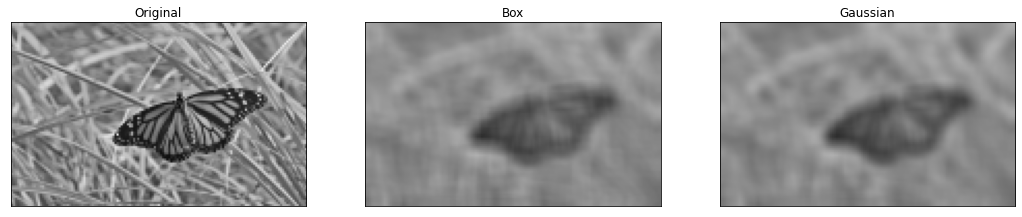

In [13]:
img = cv.imread(r'D:\Image processing module\Lecture3\butterfly.jpg',cv.IMREAD_REDUCED_GRAYSCALE_8)
#box filter
assert img is not None

box=1./81.*np.ones((9,9))
imgb=cv.filter2D(img,-1,box)
#Gaussian filter
gaus=cv.getGaussianKernel(9,4)
imgg=cv.sepFilter2D(img,-1,gaus,gaus)

fig,axes=plt.subplots(1,3,sharex='all',sharey='all',figsize=(18,18))

img_plt = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_pltb = cv.cvtColor(imgb,cv.COLOR_BGR2RGB)
img_pltg = cv.cvtColor(imgg,cv.COLOR_BGR2RGB)

axes[0].imshow(img_plt,cmap='gray',vmin=0,vmax=255)
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(img_pltb,cmap='gray',vmin=0,vmax=255)
axes[1].set_title('Box')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(img_pltg,cmap='gray',vmin=0,vmax=255)
axes[2].set_title('Gaussian')
axes[2].set_xticks([]),axes[2].set_yticks([])
plt.show()

Question 2

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

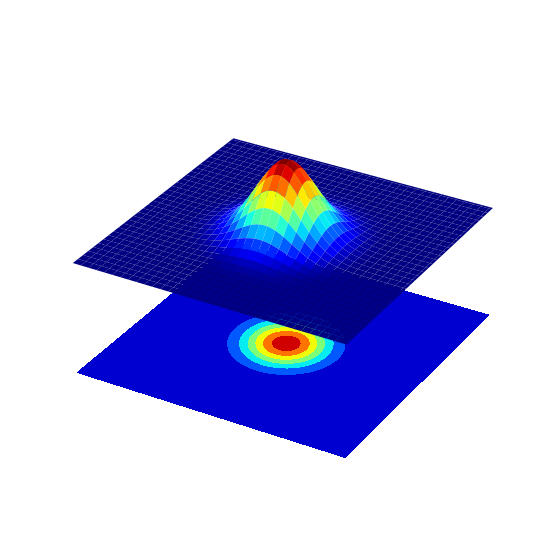

In [77]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sigma = 1

x_=np.arange(-5,5.1,.1)
y_=np.arange(-5,5.1,.1)
X,Y=np.meshgrid(x_,y_)
Z=(1/(2*np.pi*sigma**2))*np.exp(-(X**2+Y**2)/(2*sigma**2))
Z1 = np.exp(-(X**2+Y**2)/(2*sigma**2))

#plot the surface
surf = ax.plot_surface(X,Y,Z1, cmap=cm.jet, linewidth=0, antialiased= True)

#customize the z axis
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%0.2f'))

cset=ax.contourf(X,Y,Z1,zdir='z', offset=np.min(Z1)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(Z1)-2,np.max(Z1))

plt.axis('off')
plt.show()

Question 3

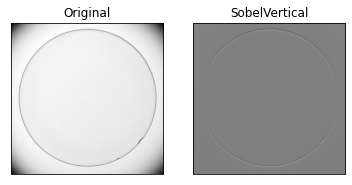

In [85]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img= cv.imread(r'D:\Image processing module\Lecture3\contact_lens.tif',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
kernel=np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype='float')
imgc1=cv.filter2D(img,-1,kernel)

fig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(6,6))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imgc1,cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_title('SobelVertical')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

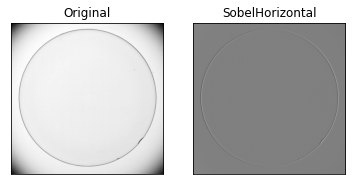

In [86]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img= cv.imread(r'D:\Image processing module\Lecture3\contact_lens.tif',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
kernel=np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype='float')
imgc2=cv.filter2D(img,-1,kernel)

fig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(6,6))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imgc2,cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_title('SobelHorizontal')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

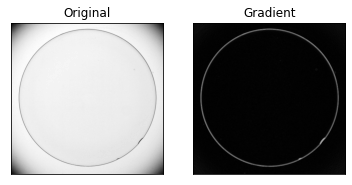

In [87]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img= cv.imread(r'D:\Image processing module\Lecture3\contact_lens.tif',cv.IMREAD_REDUCED_GRAYSCALE_2)
gradient=np.sqrt((imgc1**2)+(imgc2**2))

fig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(6,6))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(gradient,cmap='gray')
axes[1].set_title('Gradient')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

Question 4

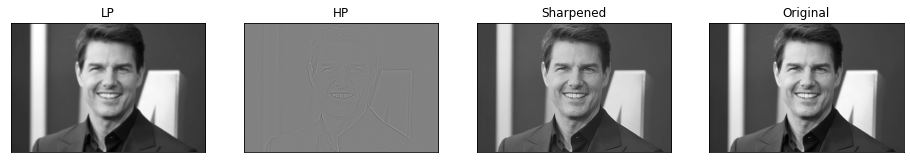

In [95]:
img= cv.imread(r'D:\Image processing module\Lecture3\tom.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sigma=2
gaus=cv.getGaussianKernel(5,sigma)
f_lp=cv.sepFilter2D(img,-1,gaus,gaus)
f_hp=img-f_lp
f_sharp = cv.addWeighted(img,3,f_hp,2,1)

#img_plt = cv.cvtColor(img,cv.COLOR_BGR2RGB)

fig,axes=plt.subplots(1,4,sharex='all',sharey='all',figsize=(16,16))
axes[0].imshow(f_lp,cmap='gray')
axes[0].set_title('LP')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(f_hp,cmap='gray')
axes[1].set_title('HP')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(f_sharp,cmap='gray')
axes[2].set_title('Sharpened')
axes[2].set_xticks([]),axes[1].set_yticks([])
axes[3].imshow(img,cmap='gray')
axes[3].set_title('Original')
axes[3].set_xticks([]),axes[1].set_yticks([])
plt.show()
